# Sales Data Analysis

## Introduction

This project involves analyzing an online retail dataset to gain insights into sales performance, customer behavior, and product trends. The dataset includes transaction-level details such as invoice numbers, product descriptions, quantities, prices, and customer IDs. The goals of this analysis are to:

1. Calculate total sales per month.
2. Identify the best-selling products.
3. Examine sales trends over time.
4. Calculate customer lifetime value.
5. Segment customers based on their spending.

## Importing Libraries


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json

## Importing Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_excel("/content/drive/MyDrive/SQL/Online Retail.xlsx") # xlsx file

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# General Inspection

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data Cleaning

In [11]:
df['Description'].fillna('Unknown', inplace=True)
df['CustomerID'].fillna('Unknown', inplace=True)

<ipython-input-11-92cc67efb4f2>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['CustomerID'].fillna('Unknown', inplace=True)


# Initiating SQL

In [12]:
import sqlite3

conn = sqlite3.connect('/content/drive/MyDrive/SQL/Online Retail.db')
cursor = conn.cursor()

In [13]:
conn

In [14]:
cursor.execute('''CREATE TABLE IF NOT EXISTS sales (transaction_id TEXT PRIMARY KEY, product_id TEXT, sales_amount REAL, date TEXT)''')
conn.commit()

In [15]:
df.to_sql('sales', conn, if_exists='replace', index=False)

541909

# Analysis Through Queries

## Total Sales per Month

Query

In [17]:
query = '''
SELECT strftime('%Y-%m', InvoiceDate) AS month, SUM(UnitPrice*Quantity) AS total_sales FROM sales GROUP BY month;
'''

Result

In [18]:
df_sales_per_month = pd.read_sql_query(query, conn)
df_sales_per_month.head()

,month,total_sales
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121


VIsualisaiton

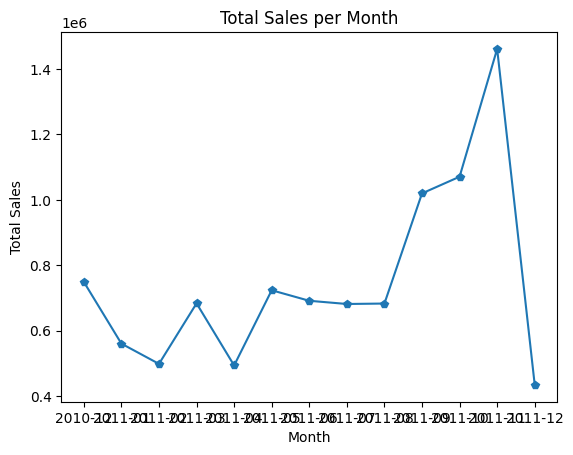

In [19]:
#plt.figure(figsize=(14, 6))
plt.plot(df_sales_per_month['month'], df_sales_per_month['total_sales'], marker='p', linestyle='-')
plt.title('Total Sales per Month')
#plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total Sales')
#plt.grid(True)
plt.show()

## Best Selling Products

Query

In [21]:
query = '''
select Description, sum(Quantity*UnitPrice) as total_sales from sales group by Description order by total_sales desc limit 11
'''

Result

In [22]:
df_best_selling_products = pd.read_sql_query(query, conn)
df_best_selling_products

,Description,total_sales
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03
5,RABBIT NIGHT LIGHT,66756.59
6,POSTAGE,66230.64
7,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
8,ASSORTED COLOUR BIRD ORNAMENT,58959.73
9,CHILLI LIGHTS,53768.06


Visualisation

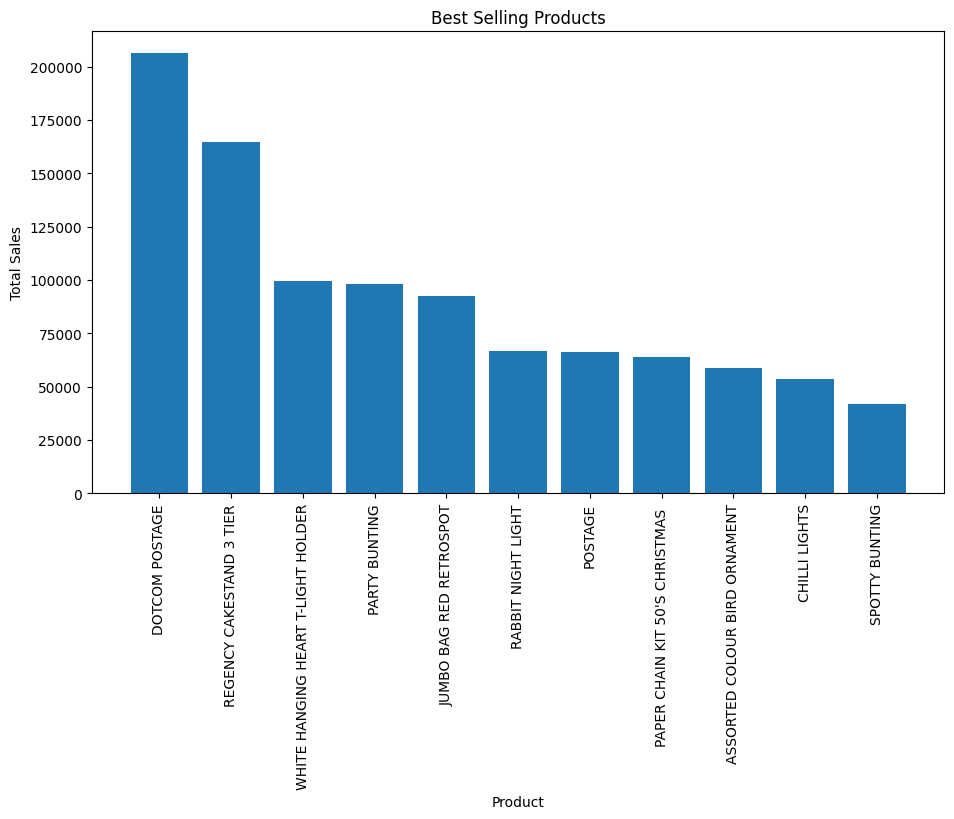

In [23]:
plt.figure(figsize=(11, 6))
plt.bar(df_best_selling_products['Description'], df_best_selling_products['total_sales'])
plt.title('Best Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

## Sales Trends Over Time

Query

In [24]:
query = '''
select strftime('%Y-%W', InvoiceDate) as week, sum(UnitPrice*Quantity) as total_sales from sales group by week order by week;
'''

Result

In [25]:
df_sales_trends = pd.read_sql_query(query, conn)
df_sales_trends.head()

,week,total_sales
0,2010-48,181847.25
1,2010-49,270287.03
2,2010-50,207052.17
3,2010-51,89770.57
4,2011-01,93720.93


Visualisation

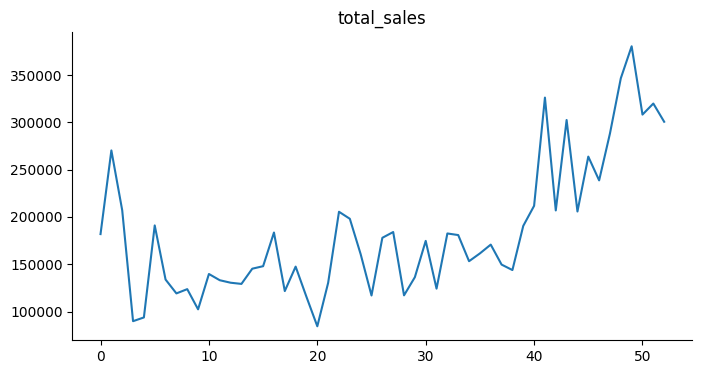

In [26]:
from matplotlib import pyplot as plt
df_sales_trends['total_sales'].plot(kind='line', figsize=(8, 4), title='total_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

## Customer Lifetime Value

Query

In [27]:
query = '''
with CustomerPurchases as (select CustomerID, sum(Quantity * UnitPrice) as total_spent, count(distinct InvoiceNo) as num_invoices
                           from sales group by CustomerID)

select CustomerID, total_spent, num_invoices, total_spent/nullif(num_invoices, 0) as avg_invoice_value
from CustomerPurchases order by total_spent desc;
'''

Result

In [28]:
df_customer_spending = pd.read_sql_query(query, conn)
df_customer_spending

,CustomerID,total_spent,num_invoices,avg_invoice_value
0,Unknown,1447682.12,3710,390.210814
1,14646.0,279489.02,77,3629.727532
2,18102.0,256438.49,62,4136.104677
3,17450.0,187482.17,55,3408.766727
4,14911.0,132572.62,248,534.567016
...,...,...,...,...
4368,12503.0,-1126.00,1,-1126.000000
4369,17603.0,-1165.30,5,-233.060000
4370,14213.0,-1192.20,1,-1192.200000
4371,15369.0,-1592.49,1,-1592.490000


Visualisation

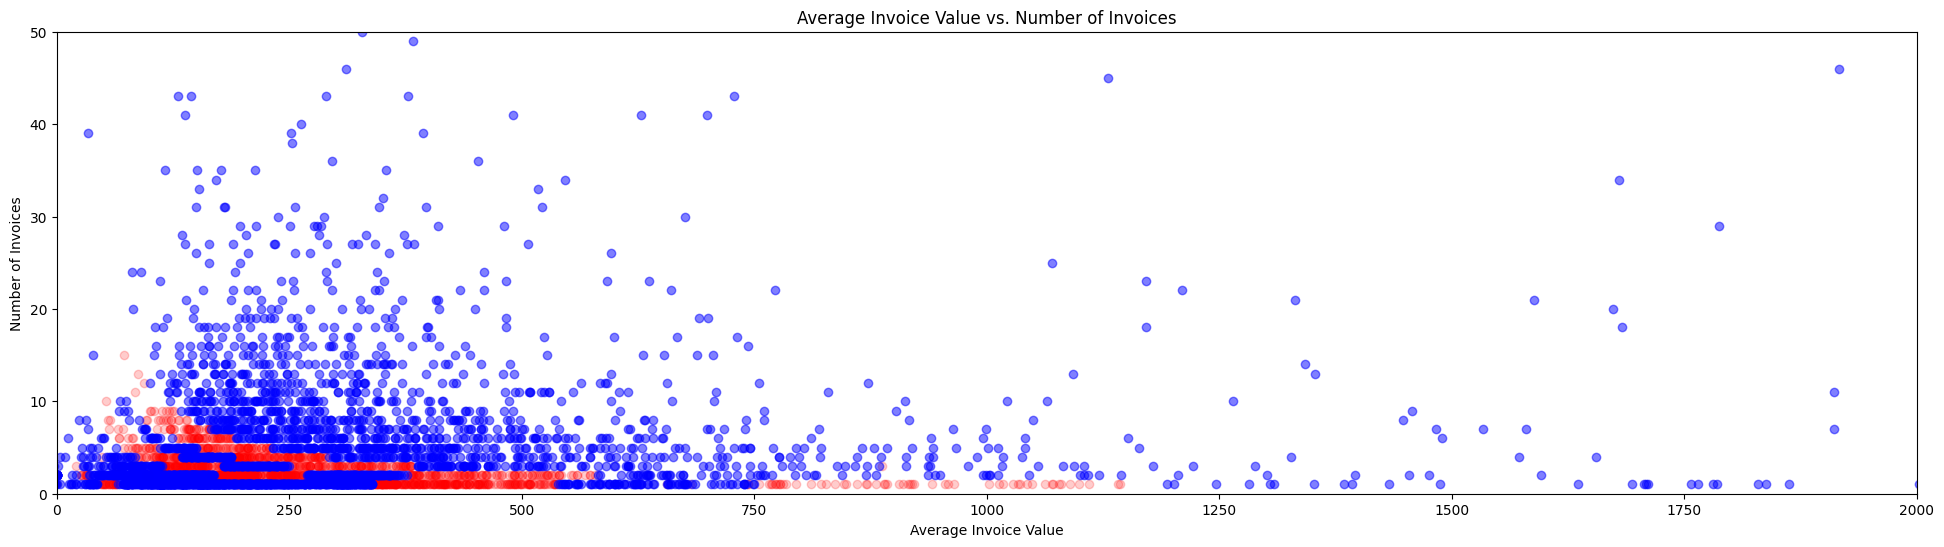

In [29]:
unknown_mask = df['CustomerID'] == 'Unknown'

plt.figure(figsize=(24,6))
plt.scatter(df_customer_spending['avg_invoice_value'][unknown_mask], df_customer_spending['num_invoices'][unknown_mask], color='red', label='Unknown invoices', alpha=.2)
plt.scatter(df_customer_spending['avg_invoice_value'][~unknown_mask], df_customer_spending['num_invoices'][~unknown_mask], color='blue', label='Other invoices', alpha=.5)

plt.xlim(0, 2000)
plt.ylim(0, 50)

plt.title('Average Invoice Value vs. Number of Invoices')
plt.xlabel('Average Invoice Value')
plt.ylabel('Number of Invoices')
plt.show()
# red spots are the customers with unknown IDs

## Customer Segmentaion

Query

In [30]:
query = '''
WITH CustomerSpending AS (
    SELECT CustomerID, SUM(Quantity * UnitPrice) AS total_spent
    FROM sales
    GROUP BY CustomerID
),
SpendingCategories AS (
    SELECT
        CustomerID,
        CASE
            WHEN total_spent >= 1000 THEN 'High Value'
            WHEN total_spent BETWEEN 500 AND 999 THEN 'Medium Value'
            ELSE 'Low Value'
        END AS spending_category
    FROM CustomerSpending
)
SELECT spending_category, COUNT(*) AS num_customers
FROM SpendingCategories
GROUP BY spending_category;
'''

Result

In [31]:
df_spending_categories = pd.read_sql_query(query, conn)
df_spending_categories

,spending_category,num_customers
0,High Value,1634
1,Low Value,1834
2,Medium Value,905


Visualisation

Text(0.5, 1.0, 'Customer Spending Categories')

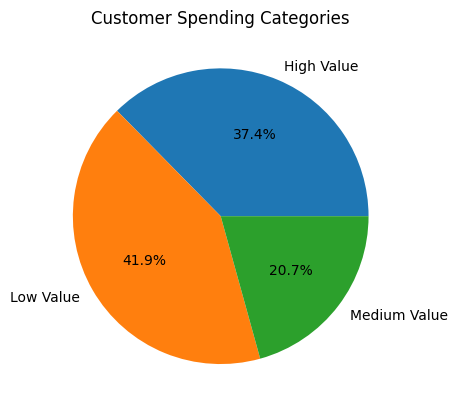

In [32]:
plt.pie(df_spending_categories['num_customers'], labels=df_spending_categories['spending_category'], autopct='%1.1f%%')
plt.title('Customer Spending Categories')

# Conclusion
This analysis provides a comprehensive view of sales data, highlighting trends, best-selling products, and customer behaviors. The insights gained from this analysis can help drive strategic business decisions, improve customer targeting, and optimize sales strategies.